# 🗺️ Part 12: FacetGrid & Multi-Dimensional Analysis with Seaborn

**Goal:** Understand how to create multi-panel plots (dashboards) using Seaborn's high-level **Figure-level functions** (`catplot`, `displot`, `relplot`). We will also learn the low-level object they are built on, `FacetGrid`, for maximum customization.

---

### Key Learning Objectives
1.  Understand the concept of a **Figure-level function** vs. an **Axes-level function**.
2.  Use `sns.catplot()`, `sns.displot()`, and `sns.relplot()` to quickly create plots faceted by columns (`col`) or rows (`row`).
3.  Use the `hue` parameter to add a third dimension of comparison.
4.  Learn to use the low-level `sns.FacetGrid` object and its `.map()` method for full control.
5.  Customize Figure-level plots using the returned grid object (`g.set_titles`, `g.add_legend`, etc.).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib # Keep for version checking if desired

# Set Seaborn theme
sns.set_theme(style="whitegrid") 

print("🎯 LAB 12.1: ENVIRONMENT SETUP")
print("✅ Seaborn, Matplotlib, and pandas imported successfully!")

# Load or create Titanic sample data (Ensure this is available)
titanic_df = pd.DataFrame({
    'Age': [22, 38, 26, 35, 35, 54, 2, 27, 14, 4, 58, 20, 39, 14, 55, 2, 
             31, 25, 8, 19, 40, 66, 28, 42, 21, 18, 14, 40, 27, 3, 45, 33, 50, 47],
    'Fare': [7.25, 71.28, 7.92, 53.10, 8.05, 51.86, 21.08, 11.13, 30.07, 16.70,
             26.55, 8.05, 31.0, 7.85, 16.0, 29.12, 26.0, 7.90, 21.08, 7.25,
             227.52, 10.5, 26.0, 13.0, 7.74, 7.05, 46.90, 26.55, 7.23, 21.08, 26.25, 7.75, 12.52, 7.75],
    'Sex': ['male', 'female', 'female', 'female', 'male', 'male', 'male', 
             'male', 'female', 'female', 'male', 'male', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'female',
             'male', 'female', 'male', 'female', 'female', 'female', 'male',
             'male', 'female', 'male', 'female', 'male', 'female'],
    'Pclass': [3, 1, 3, 1, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 2, 3, 2, 3,
                1, 2, 2, 3, 3, 3, 1, 1, 3, 3, 2, 3, 3, 3],
    'Survived': [0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
                  1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1]
})

# We'll drop rows where 'Age' is missing for this analysis
titanic_df = titanic_df.dropna(subset=['Age'])

print("✅ Titanic data loaded and cleaned (removed NA Ages).")

🎯 LAB 12.1: ENVIRONMENT SETUP
✅ Seaborn, Matplotlib, and pandas imported successfully!
✅ Titanic data loaded and cleaned (removed NA Ages).


## 1. `sns.FacetGrid` (The Manual, Low-Level Approach)

`FacetGrid` is the object that controls the subplot layout. You first initialize an empty grid by telling it *which* columns to use for `col` (columns) and `row` (rows).

Then, you use the `.map()` method to tell it *what* kind of plot to draw on each empty axes.

🎯 LAB 12.2: The Low-Level `sns.FacetGrid`


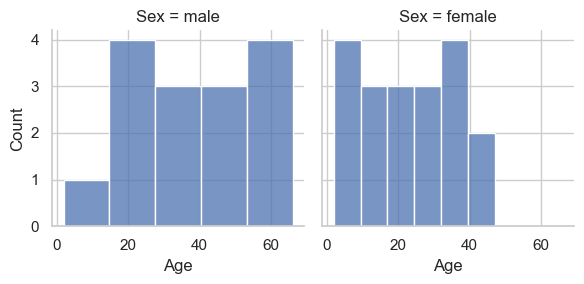

In [2]:
print("🎯 LAB 12.2: The Low-Level `sns.FacetGrid`")

# 1. Initialize an empty grid. 
# This tells Seaborn to create columns based on the 'Sex' variable.
g = sns.FacetGrid(titanic_df, col='Sex')

# 2. "Map" a plotting function (like sns.histplot) to each axes in the grid.
# The arguments 'Age' are passed *into* sns.histplot.
g.map(sns.histplot, 'Age')

plt.show()

## 2. Multi-Dimensional FacetGrid (`col`, `row`, `hue`)

You can create a grid using columns, rows, and `hue` all at once.

* `col='Pclass'` -> Creates 3 columns of plots
* `row='Survived'` -> Creates 2 rows of plots
* `hue='Sex'` -> Creates 2 colors *within* each plot

🎯 LAB 12.3: Multi-Dimensional Grids


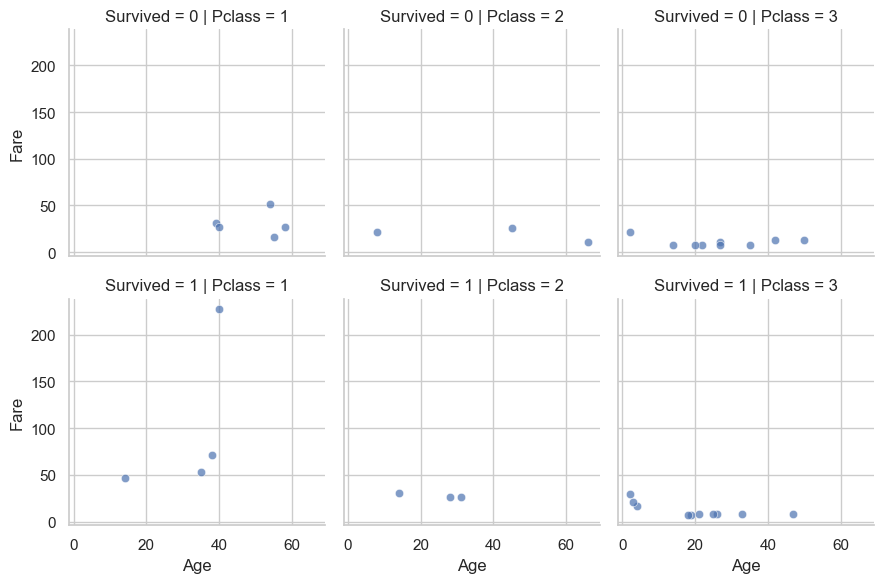

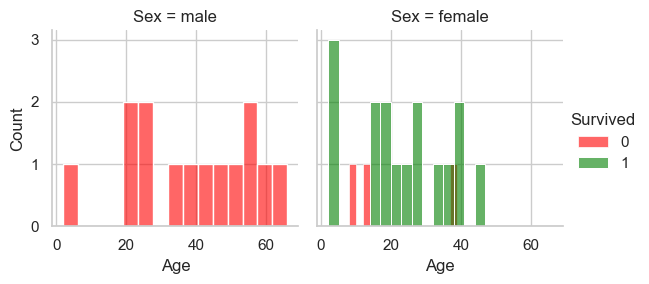

In [3]:
print("🎯 LAB 12.3: Multi-Dimensional Grids")

# Example 1: Using `col` and `row`
# This creates a 2x3 grid (2 Survived categories x 3 Pclass categories)
g = sns.FacetGrid(titanic_df, col='Pclass', row='Survived')
g.map(sns.scatterplot, 'Age', 'Fare', alpha=0.7)
plt.show()


# Example 2: Using `col` and `hue`
# This creates a 1x2 grid (for 'Sex')
# ... and plots 2 histograms (for 'Survived') on *each* plot.
g = sns.FacetGrid(titanic_df, col='Sex', hue='Survived', 
                  palette={0:'red', 1:'green'})
g.map(sns.histplot, 'Age', alpha=0.6, bins=15)
g.add_legend() # We must manually add the legend for FacetGrid
plt.show()

## 3. `sns.catplot` (The High-Level Wrapper for Categorical Plots)

The `FacetGrid` approach is powerful but clunky. For 90% of cases, you can use a **Figure-level function** instead.

`sns.catplot()` (Categorical Plot) is the Figure-level wrapper for plots like `countplot`, `boxplot`, `violinplot`, and `barplot`.

It combines the plotting and the faceting in one command.

🎯 LAB 12.4: The 'Easy Button' - `sns.catplot`


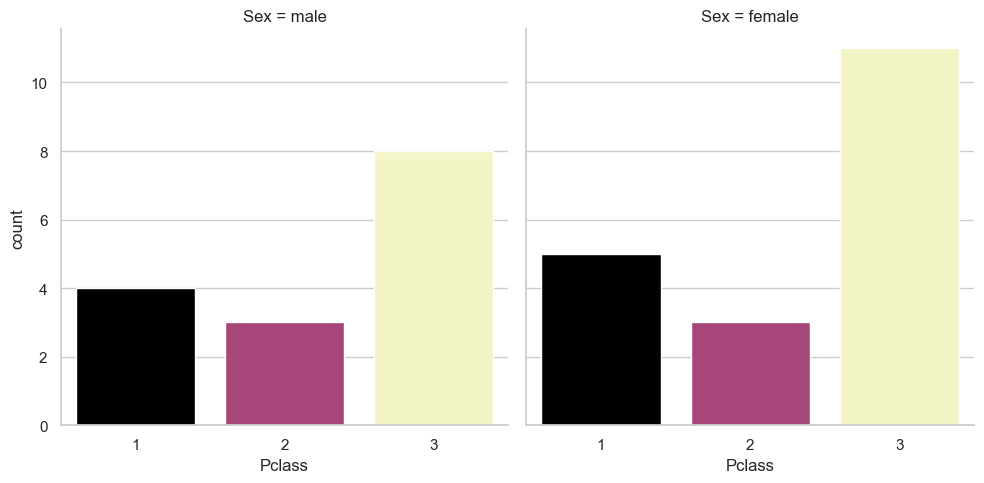

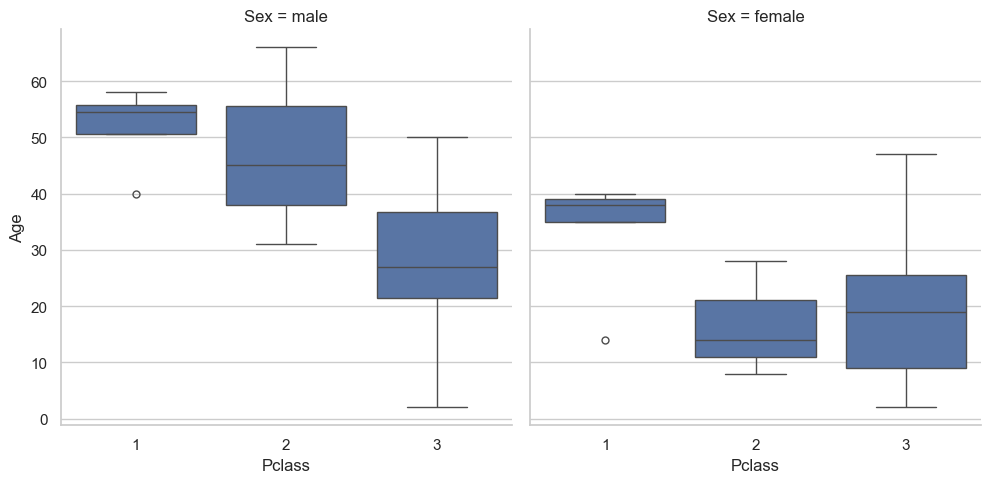

In [4]:
print("🎯 LAB 12.4: The 'Easy Button' - `sns.catplot`")

# We no longer need g.map(). We just tell catplot what 'kind' of plot we want.

# Example 1: Replicating a count histogram grid
# This one line does the same thing as a FacetGrid + map(sns.countplot)
sns.catplot(
    data=titanic_df, 
    x='Pclass',       # The variable for the x-axis
    kind='count',     # The type of plot
    col='Sex',        # The variable to make columns out of
    hue='Pclass',     # Use Pclass for hue to enable palette
    palette='magma',
    legend=False      # Disable legend
)
plt.show()


# Example 2: Creating a grid of boxplots
sns.catplot(
    data=titanic_df,
    x='Pclass',
    y='Age',
    kind='box',        # Just change the 'kind'
    col='Sex'
)
plt.show()

## 4. Other Figure-level Wrappers (`displot`, `relplot`)

Just like `catplot` handles categorical plots, Seaborn has two other Figure-level functions:

* `sns.displot()`: For distributions (like `histplot`, `kdeplot`).
* `sns.relplot()`: For relations (like `scatterplot`, `lineplot`).

They all use the same `data`, `x`, `y`, `hue`, `col`, and `row` parameters.

🎯 LAB 12.5: `displot` and `relplot`


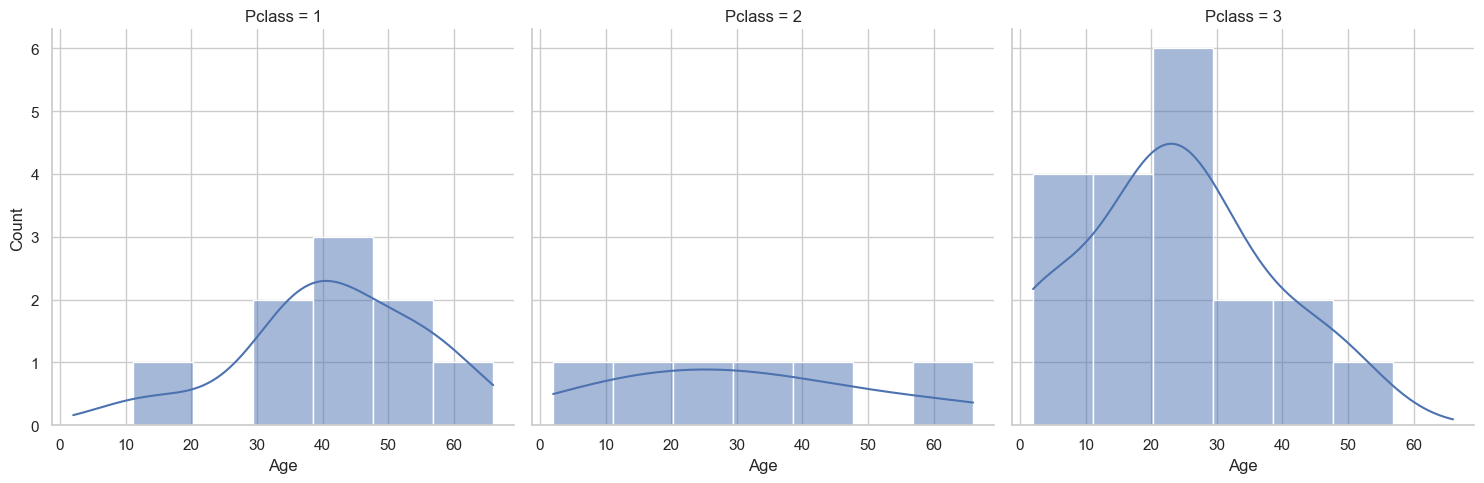

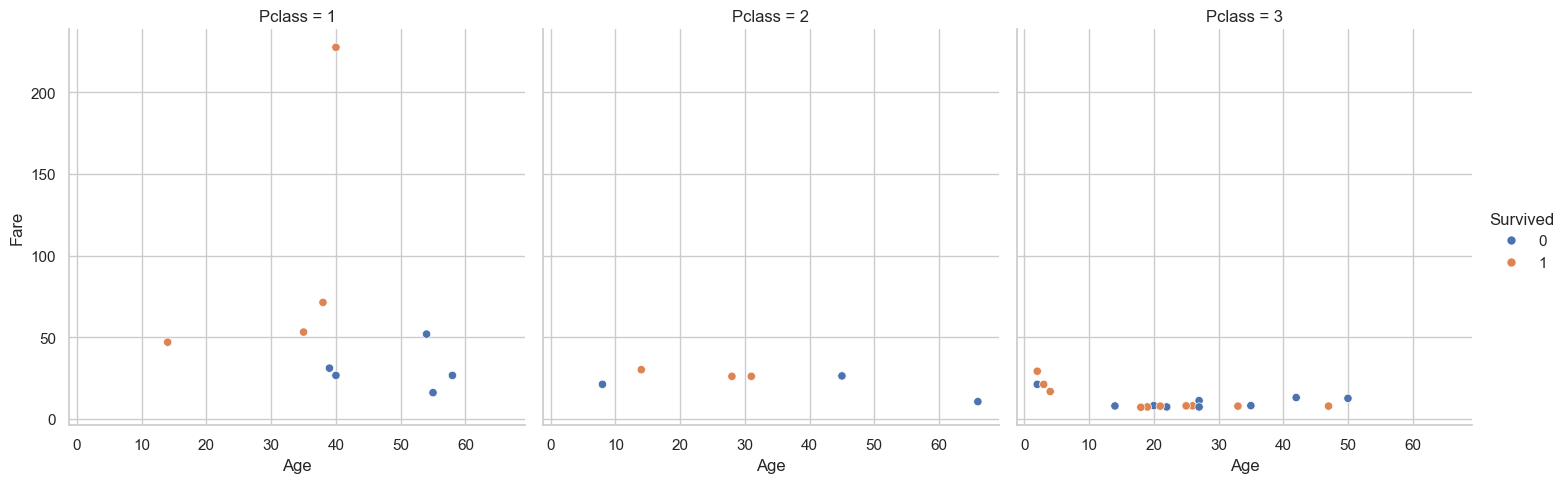

In [5]:
print("🎯 LAB 12.5: `displot` and `relplot`")

# Example 1: `displot` (Distribution Plot)
# Create histograms of Age, faceted by Pclass
sns.displot(data=titanic_df, x='Age', col='Pclass', kde=True)
plt.show()


# Example 2: `relplot` (Relational Plot)
# This is the most powerful one. 
# We are plotting 4 dimensions of data in one command:
# x = Age, y = Fare, col = Pclass, hue = Survived
sns.relplot(
    data=titanic_df, 
    x='Age', 
    y='Fare', 
    col='Pclass',   # Creates 3 subplots
    hue='Survived'  # Colors points by survival
)
plt.show()

## 5. Customizing and Saving Figure-Level Plots

When you use a Figure-level function (`catplot`, `relplot`, `displot`), it returns the `FacetGrid` object (usually named `g`).

You **cannot** use `plt.title()` or `ax.set_xlabel()`. You **must** use the methods on the `g` object.

* `g.set_axis_labels("X Label", "Y Label")`
* `g.set_titles("Title for {col_name} / {row_name}")`
* `g.fig.suptitle("Main Title")`
* `g.add_legend()`
* `g.savefig("filename.png")`

🎯 LAB 12.6: Customizing and Saving Figure-level Plots
💾 Plot saved as 'seaborn_part12_facetgrid_report.png'


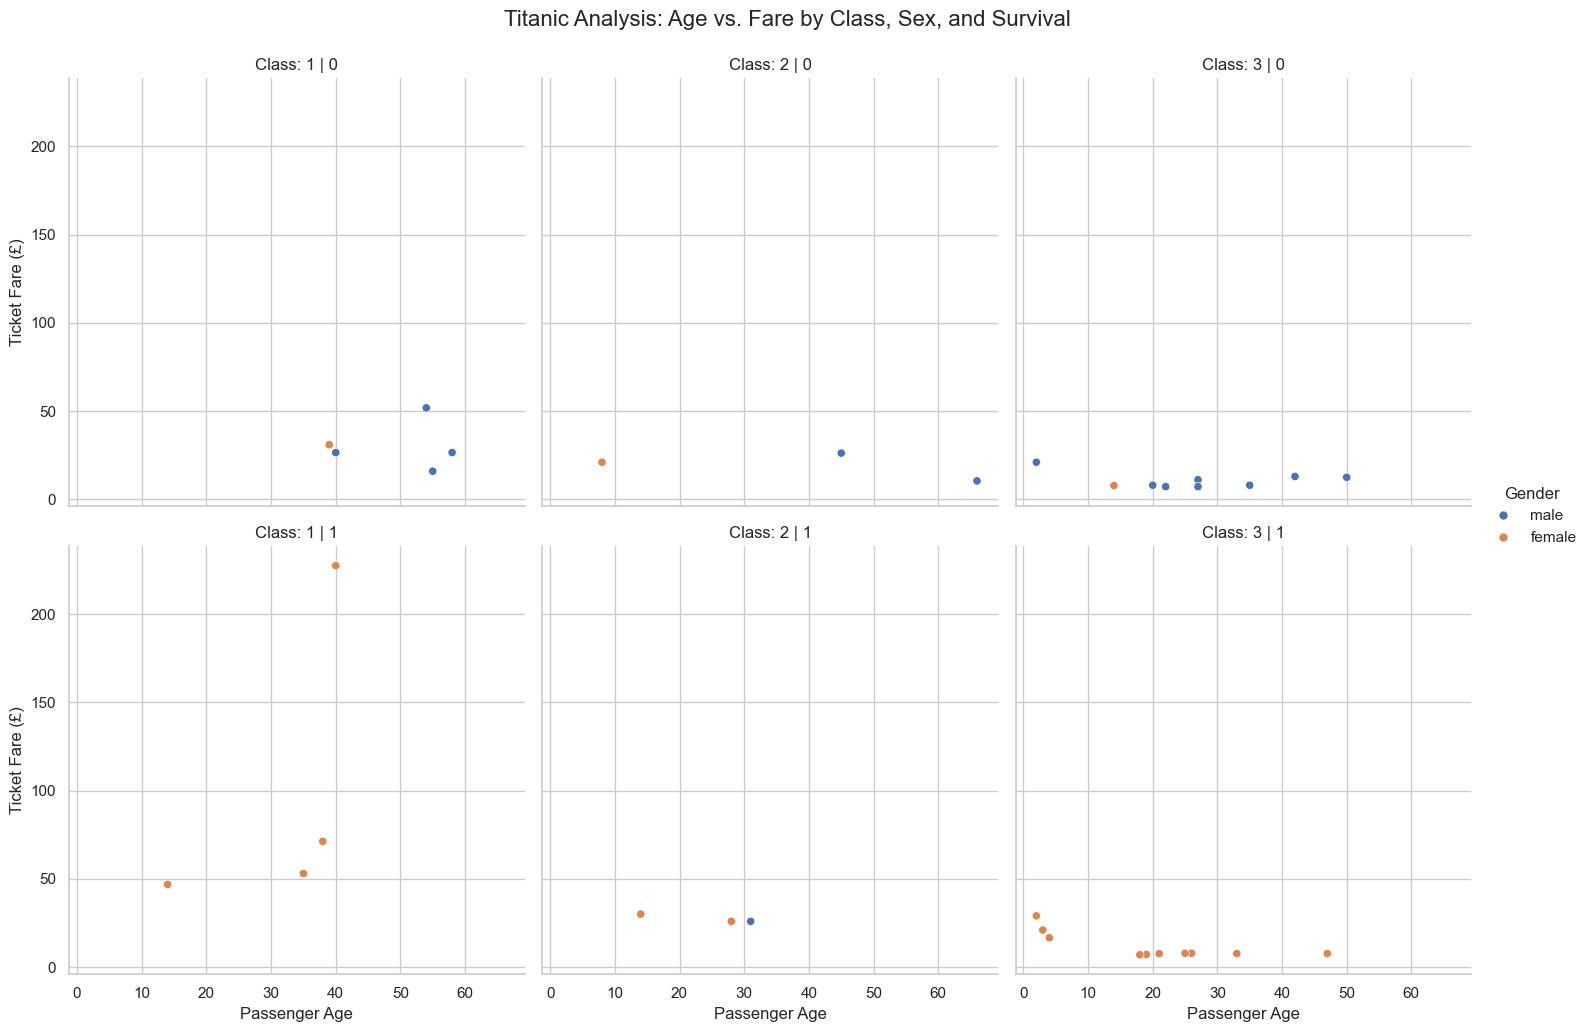


🎉 Part 12 complete! You've mastered Seaborn's Figure-level functions.


In [6]:
print("🎯 LAB 12.6: Customizing and Saving Figure-level Plots")

# 1. Create the plot
g = sns.relplot(
    data=titanic_df, 
    x='Age', 
    y='Fare', 
    hue='Sex',
    row='Survived',
    col='Pclass'
)

# 2. Customize the plot using the 'g' object
g.set_axis_labels("Passenger Age", "Ticket Fare (£)") # Set main x and y labels
g.set_titles("Class: {col_name} | {row_name}") # Use {col_name} and {row_name} as placeholders

# Add a main title above all subplots
g.fig.suptitle("Titanic Analysis: Age vs. Fare by Class, Sex, and Survival", y=1.03, fontsize=16)

# Customize the legend
g.legend.set_title("Gender")

# 3. Save the figure *before* showing it
try:
    g.savefig("seaborn_part12_facetgrid_report.png", dpi=300)
    print("💾 Plot saved as 'seaborn_part12_facetgrid_report.png'")
except Exception as e:
    print(f"❌ Error saving plot: {e}")

# 4. Show the plot
plt.show()

print("\n🎉 Part 12 complete! You've mastered Seaborn's Figure-level functions.")